# PSPC Results

## Pattern Separation:

In [27]:
# import necessary libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [32]:
# add figure path
figurepath = 'C:/Users/tuq67942/OneDrive - Temple University/Documents/Figures/'
# import dfs
PSagedf = pd.read_csv('csvs/PSoutputdf_exactage.csv')
PSdf = pd.read_csv('csvs/PSoutputdf.csv')
PSdelaydf = pd.read_csv('csvs/PSdelaydf.csv')
stackeddf = pd.read_csv('csvs/PS_cat_Year_1.csv')

## Proportion selected of Target, Lure, and Foil for pattern separation
#### Stars indicate delay of 1 week between encoding and retrieval 

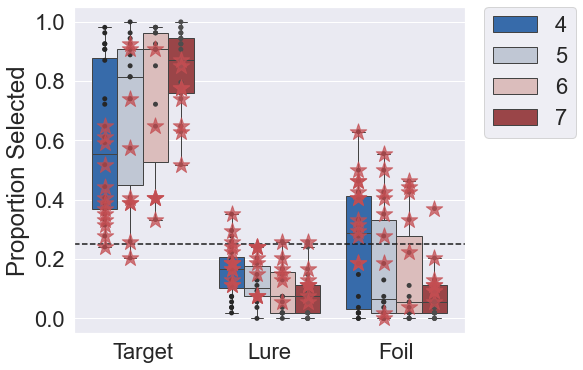

In [10]:
order = ['Target','Lure','Foil']
orderage = [4,5,6,7]

sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(data=PSdf, x="Selection", y="Proportion Selected", hue="Age", palette="vlag",order=order, showfliers = False)
sns.stripplot(data=PSdf, x="Selection", y="Proportion Selected", hue="Age", dodge=True,palette='dark:.3',order=order, jitter=False,legend=False)
vs = {k:[] for k in orderage}
for i,points in enumerate(ax.collections):
	vertices = points.get_offsets().data
	if len(vertices)>0:
		for ii,a in enumerate([4,7,6,5]):
			if (i+ii) % 4 == 0:
				vs[a].append(vertices[0][0])
for subject in PSdelaydf.Subject.unique():
	tmp = PSdelaydf[PSdelaydf.Subject == subject]
	age = tmp['Age'].iloc[0]
	for i,selection in enumerate(order):
		data = tmp[tmp.Selection==selection]['Proportion Selected'].iloc[0]
		ax.scatter(vs[age][i],data,marker='*',color='r',alpha=0.75, s=300,zorder=3)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel=None)
plt.axhline(y=0.25, color='k', linestyle='--')
fig.savefig(figurepath+'PS_Target_Lure_Foil.png', bbox_inches='tight', dpi=100)

### plot correlation between age and Target/Lure/Foil proportion 

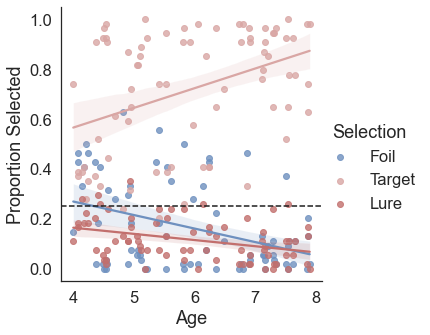

In [21]:
sns.set_theme(style="white",font_scale=1.5, palette=['#6e90bf',  '#d9a6a4', '#c26f6d'])
g = sns.lmplot(data=PSagedf,x="Age", y="Proportion Selected", hue="Selection")
plt.axhline(y=0.25, color='k', linestyle='--')
g.savefig(figurepath+'PS_corr_Target_Lure_Foil.png', bbox_inches='tight', dpi=100)

### Correlation between age and proportion selected of Foil, Target, and Lure:

In [30]:
PSkey = {-1:'Foil',1:'Target',0:'Lure'}
statlist = []
for selection in PSkey.values():
	tmpdf = PSagedf[PSagedf['Selection'] == selection]
	res = stats.pearsonr(tmpdf['Age'],tmpdf['Proportion Selected'])
	statlist.append({'Selection':selection, 'Age/Prop r':res[0], 'Age/Prop p':res[1]})
statdf=pd.DataFrame(statlist)
display(statdf)

,Selection,Age/Prop r,Age/Prop p
0,Foil,-0.371262,0.000819
1,Target,0.391256,0.000397
2,Lure,-0.354961,0.001428


In [38]:
#import statsmodels.formula.api as sm2

#result = sm2.ols(formula='Age~Delay+Foil+Target+Lure',data=stackeddf).fit()
#print(result.summary()) #no interaction!

### Does delay make a difference in accuracy? Yes!

In [39]:
from pingouin import ttest
ttest(stackeddf[stackeddf['Delay']==True]['Target'],stackeddf[stackeddf['Delay']==False]['Target'])


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-8.112876,59.514289,two-sided,3.324386e-11,"[-0.42, -0.26]",1.89837,9.25e+08,1.0
